In [4]:
%matplotlib inline
%run ../common/functions.py
import sys
import matplotlib.pyplot as plt
np.random.seed(seed=123)

Numpy.polyfit を使ったカーブフィッティング  
https://qiita.com/maskot1977/items/f9e84fb6e62f7015d6c4

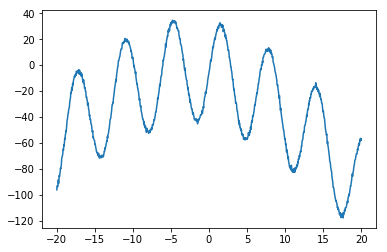

In [5]:
#Define data, supervised data
def target_func(x):
    return 40.0*np.sin(x/1.0) - (0.3*(x+6.0))**2 - (0.2*(x-4.0))**2 - 1.0*np.abs(x+2.0) + np.random.normal(0,1,1)
#
xmin = -20
xmax = 20
Nx = 1000
x = np.linspace(xmin, xmax, Nx)
z = list(map(target_func,x)) #for python3
z = np.array(z)
plt.plot(x, z) #### plot true data
plt.show()
def generate_sample(xval):
    zval = 0.0*xval
    for i in range(len(xval)):
        xid = np.argmin((x - xval[i])**2)
        zval[i] = z[xid]
    return zval

/home/shinohara/work/development/GPR_Note/common/functions.py:73: RankWarning: Polyfit may be poorly conditioned
  polyinfo = np.polyfit(_xsample, _ysample, _deg)


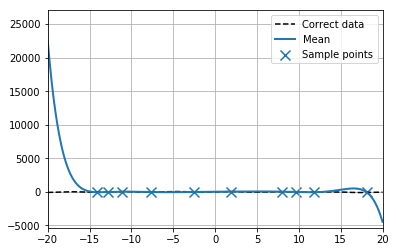

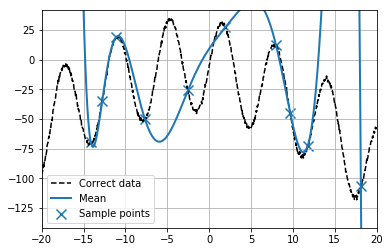

In [6]:
#
#Definition of array
Nsample = 10
x_sample = np.array([])
y_sample = np.array([])
x_point = np.random.uniform(xmin, xmax, Nsample) #Initial point is randomely chosen
#
x_sample = np.append(x_sample,x_point)                          #Add x_point to x_sample
y_point = generate_sample(x_point)                              #Get y_point value from x_sample
y_sample = np.append(y_sample,y_point)                          #Add y_point to x_ample
#
mean = PF(x_sample, y_sample, x, len(x_sample), normalization = True)
#mean = PF(x_sample, y_sample, x, 4, normalization = True)

plt.figure()
plt.xlim(xmin,xmax)
plt.ylim(1.2*min(np.amin(z),np.amin(mean)),1.2*max(np.amax(z),np.amax(mean)))
plt.plot(x,z,'k--',label='Correct data')
plt.plot(x,np.array(mean), label='Mean',lw=2.0)
plt.scatter(x_sample,y_sample,marker='x',s=100,label='Sample points')
plt.grid()
plt.legend()
plt.show()
#
plt.figure()
plt.xlim(xmin,xmax)
plt.ylim(1.2*np.amin(z),1.2*np.amax(z))
plt.plot(x,z,'k--',label='Correct data')
plt.plot(x,np.array(mean), label='Mean',lw=2.0)
plt.scatter(x_sample,y_sample,marker='x',s=100,label='Sample points')
plt.grid()
plt.legend()
plt.show()